In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\HP\Documents\boston housing prediction data.csv")
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

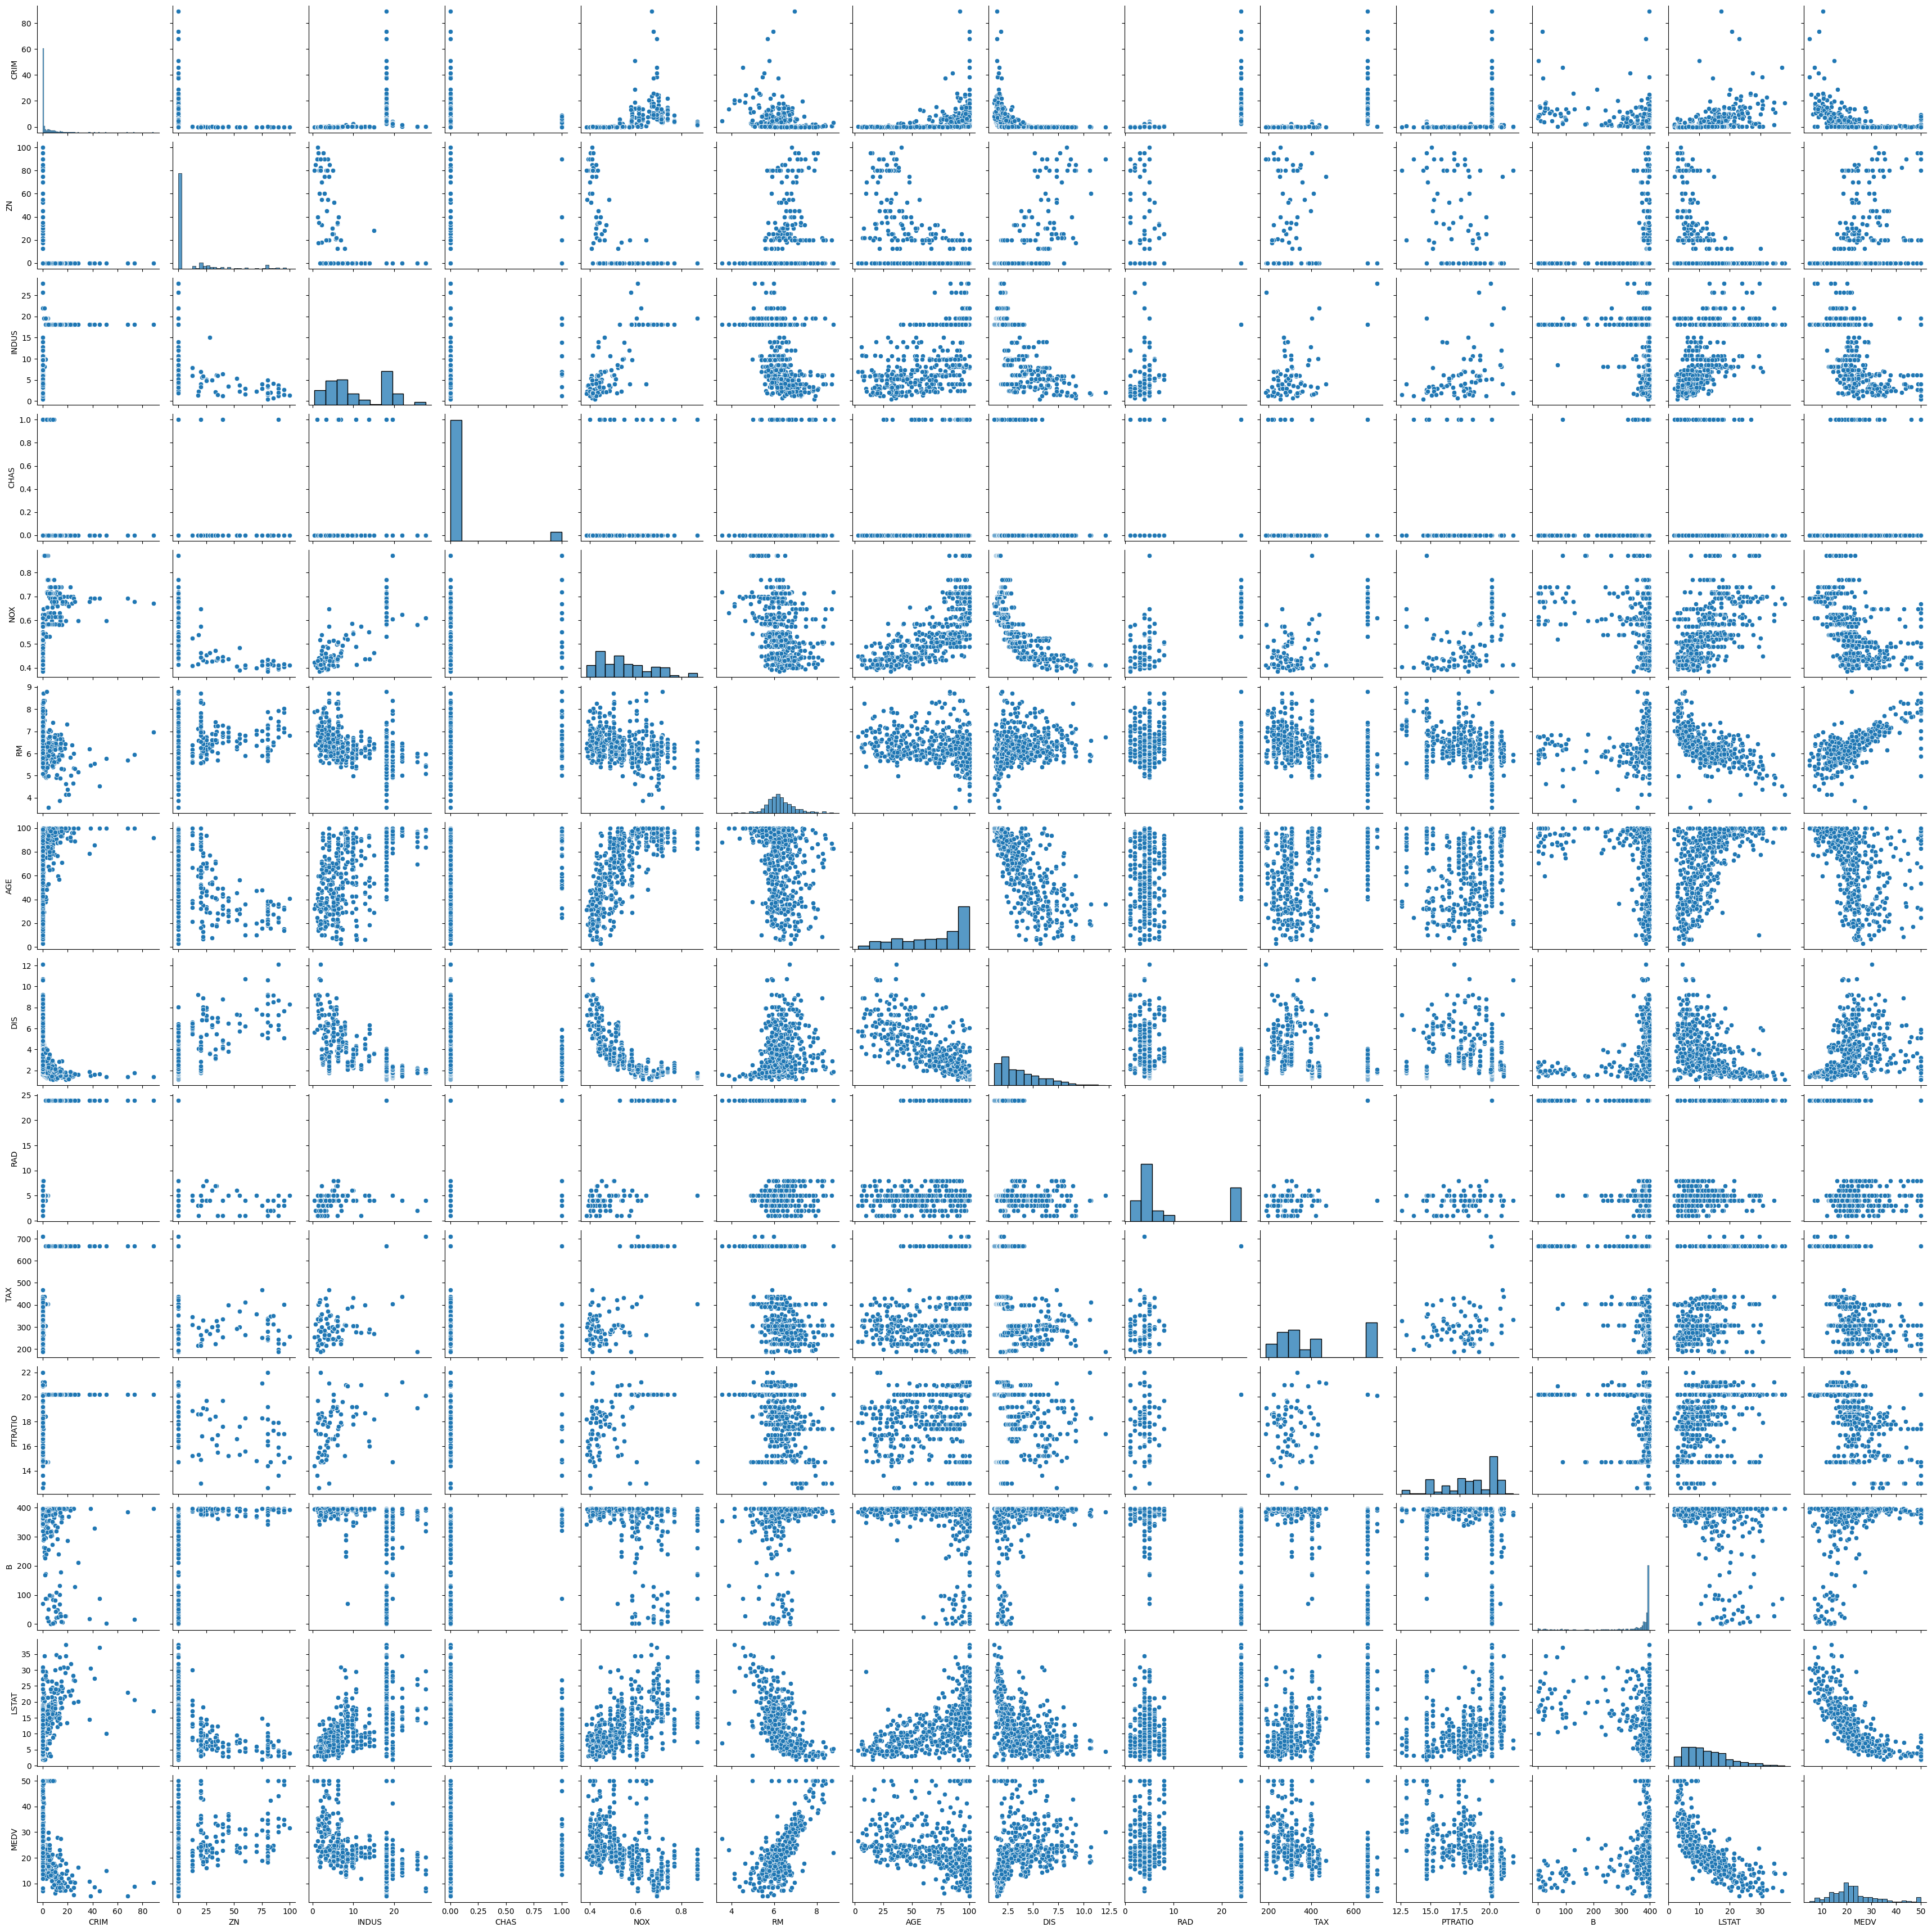

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

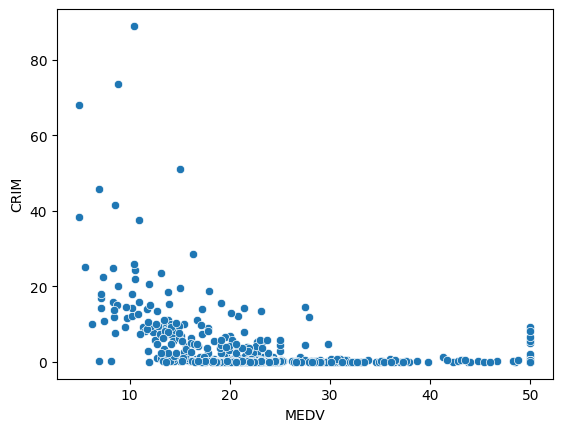

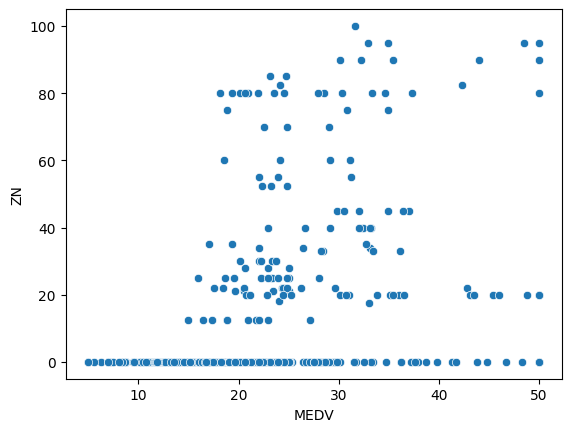

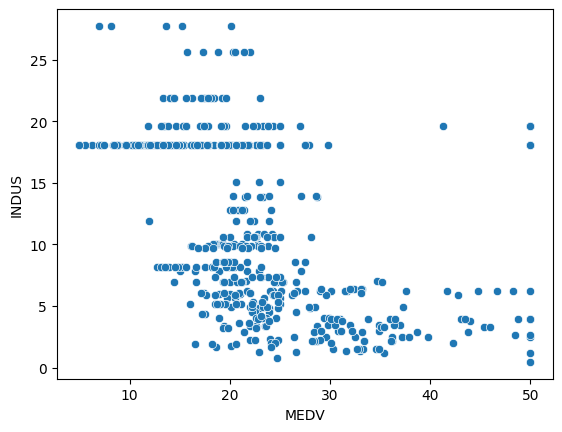

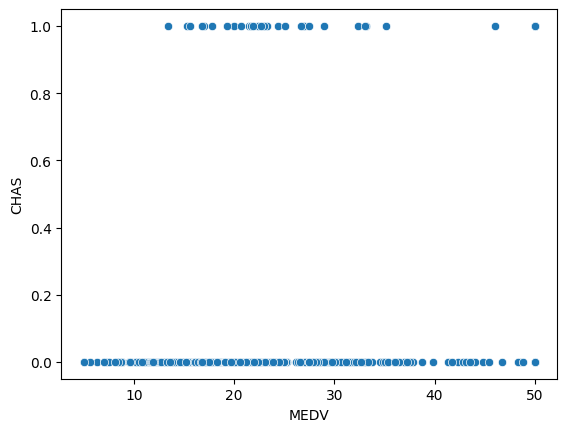

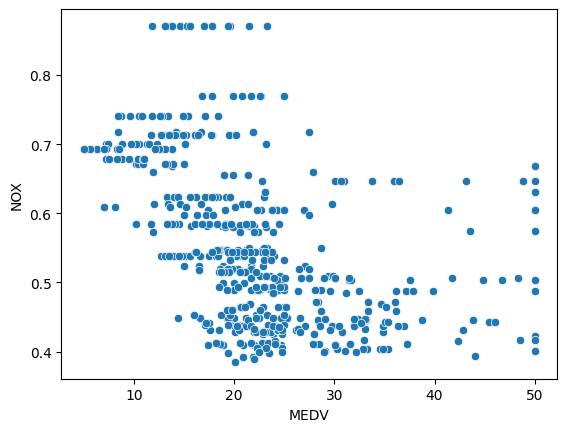

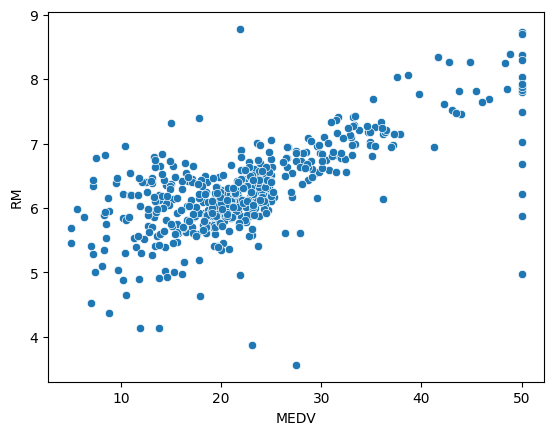

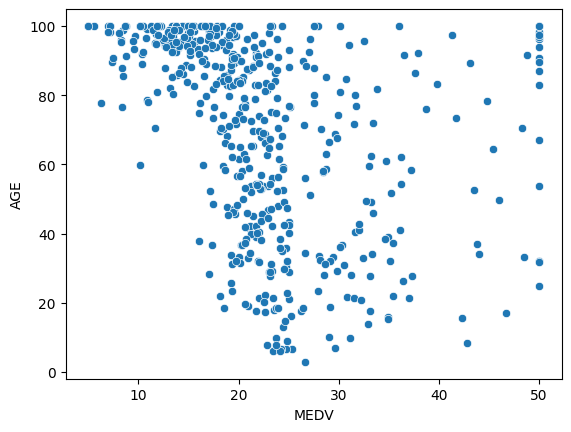

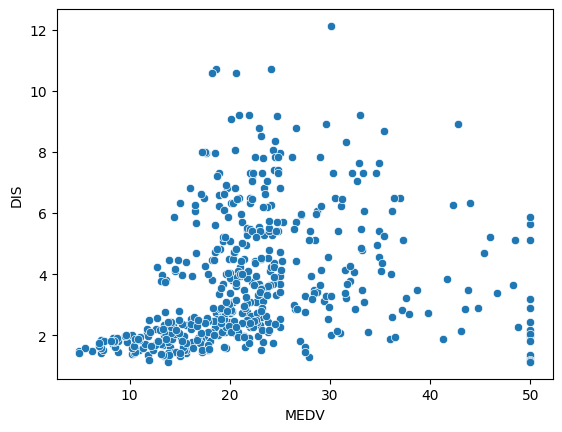

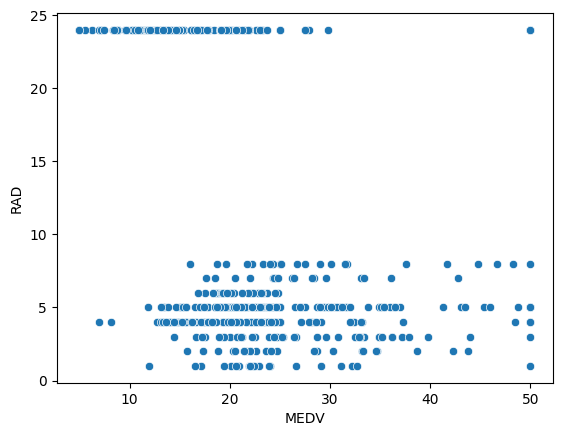

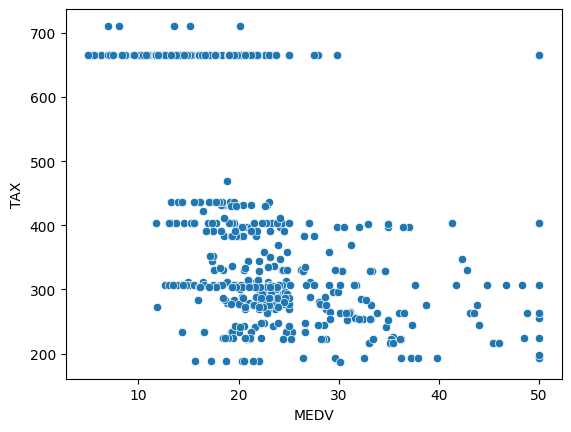

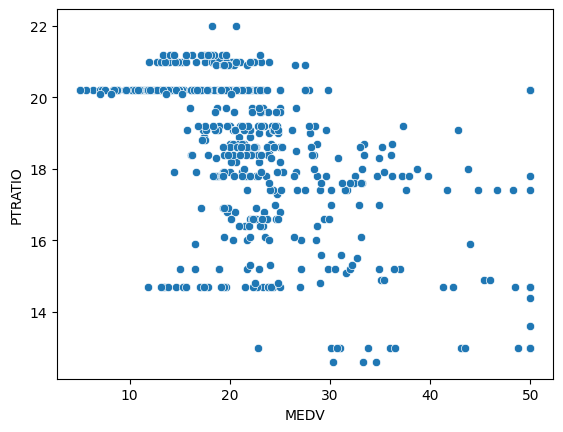

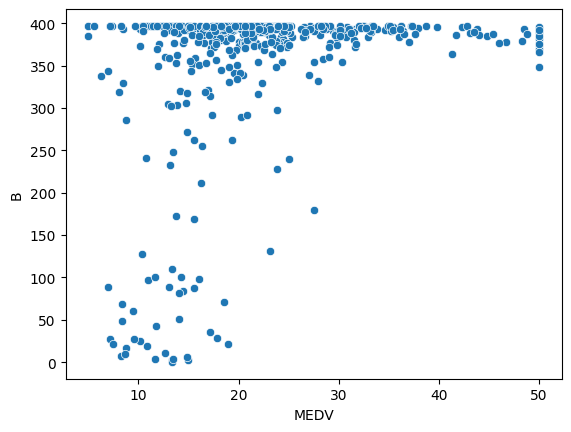

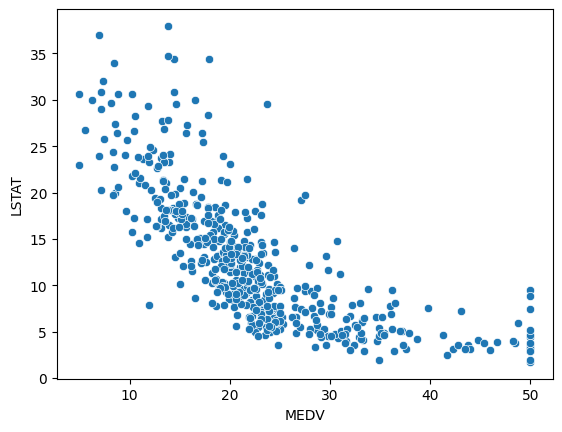

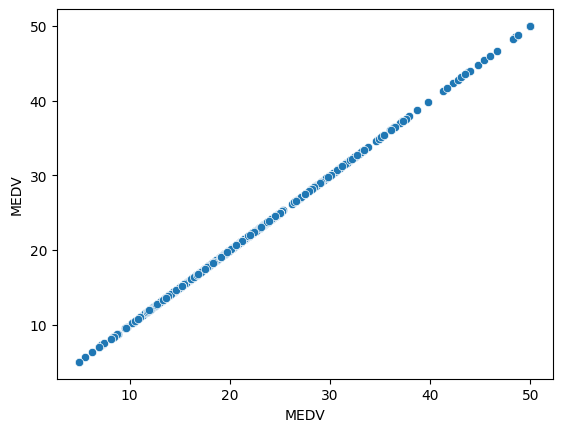

In [12]:
for col in df.columns:
    sns.scatterplot(df, x='MEDV' , y=col)
    plt.show()

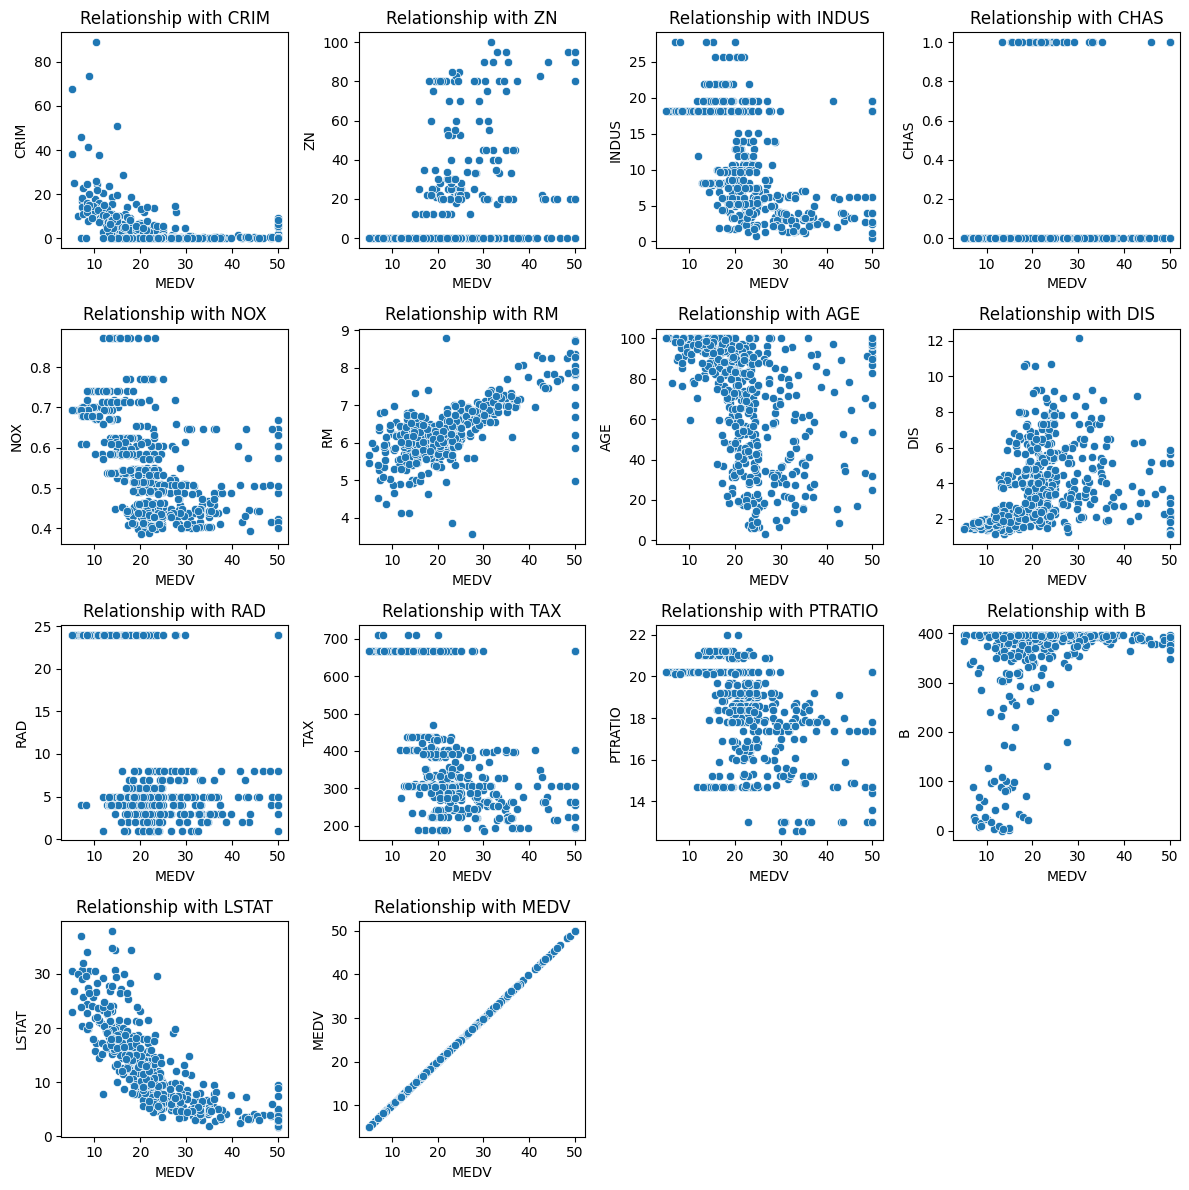

In [13]:
#Initialize subplot grid
i = 0
plt.figure(figsize=(12, 12)) #Adjust the fig size for better visibility

for col in df.columns: #Iterate through the columns of the dataframe

    i += 1 #Subplot increment index
    plt.subplot(4, 4, i) #Create a subplot in a 4x4 grid

    #Create the scatter plot
    sns.scatterplot(data=df, x='MEDV', y= col)

    #Add title for each plot
    plt.title(f'Relationship with {col}')

    #Adjust layout to prevent overlap
    plt.tight_layout()

    #Show the plot

    plt.show

In [14]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [16]:

#Separating the target or outcome variable for regression
X = df.drop(columns = ['MEDV'])
y = df['MEDV']

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=42, test_size=0.2)

In [18]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [19]:
x_test

array([[-0.40983668, -0.48772236, -1.03402724, ..., -0.85792914,
         0.42570183, -0.50645674],
       [-0.41394931,  1.22906036, -0.68968118, ..., -0.39556665,
         0.44105193, -1.27881429],
       [-0.40821211, -0.48772236,  2.42256516, ...,  0.76033959,
         0.36660394,  0.75931252],
       ...,
       [ 1.21460796, -0.48772236,  1.01599907, ...,  0.80657583,
        -3.52640114,  1.20085994],
       [-0.41447997, -0.48772236, -0.96982713, ...,  0.0205596 ,
         0.43107437,  0.02900711],
       [-0.409448  , -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.29116915, -0.52047412]], shape=(102, 13))

In [20]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [21]:
y_predict = lm.predict(x_test)

y_predict

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [25]:

rmse = root_mean_squared_error(y_test, y_predict)
print(f'The root mean square error score is:{rmse:.2f}')

The root mean square error score is:4.93
